# ReCell - Problem Statement

## Context 

Buying and selling used smartphones used to be something that happened on a handful of online marketplace sites. But the used and refurbished phone market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used smartphones that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing a smartphone. There are plenty of other benefits associated with the used smartphone market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished smartphones. Maximizing the longevity of mobile phones through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost the cheaper refurbished smartphone segment, as consumers cut back on discretionary spending and buy phones only for immediate needs.


## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone and identify factors that significantly influence it.


## Questions

1. What does the distribution of used phone prices look like?
2. What percentage of the used phone market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?
4. A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?
6. Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the used phone price?


## Data Description

The data contains the different attributes of used/refurbished phones. The detailed data dictionary is given below.


**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the phone runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the phone battery in mAh
- weight: Weight of the phone in grams
- release_year: Year when the phone model was released
- days_used: Number of days the used/refurbished phone has been used
- new_price: Price of a new phone of the same model in euros
- used_price: Price of the used/refurbished phone in euros

In [2]:
### Data Overview# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

<IPython.core.display.Javascript object>

In [4]:
data = pd.read_csv("used_phone_data.csv")

<IPython.core.display.Javascript object>

### Data Overview

In [4]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


<IPython.core.display.Javascript object>

In [14]:
data.shape

(3571, 15)

<IPython.core.display.Javascript object>

**Observation**
* The dataset has 3571 rows and 15 columns. 

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


<IPython.core.display.Javascript object>

**Observations**
* There are 3571 rows and 15 columns
* brand_name,os,4g and 5g columns are categorical variables while the others are numerical variables
* By looking at the above output of *data.info()*, we see that some columns have less number of non-null values.
    - It means some values are NULL (missing)
* The dependent variable is *used_price*

In [75]:
cat_vars = ["brand_name", "os", "4g", "5g"]


for colname in cat_vars:
    df[colname] = df[colname].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3571 non-null   category
 1   os                3571 non-null   category
 2   screen_size       3571 non-null   float64 
 3   4g                3571 non-null   category
 4   5g                3571 non-null   category
 5   main_camera_mp    3571 non-null   float64 
 6   selfie_camera_mp  3571 non-null   float64 
 7   int_memory        3571 non-null   float64 
 8   ram               3571 non-null   float64 
 9   battery           3571 non-null   float64 
 10  weight            3571 non-null   float64 
 11  release_year      3571 non-null   int64   
 12  days_used         3571 non-null   int64   
 13  new_price         3571 non-null   float64 
 14  used_price        3571 non-null   float64 
dtypes: category(4), float64(9), int64(2)
memory usage: 322.7 KB


<IPython.core.display.Javascript object>

In [16]:
# Statistical summary of the data

data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.0,NaN,NaN,NaN,14.803892,5.153092,2.7,12.7,13.49,16.51,46.36
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3391.0,NaN,NaN,NaN,9.400454,4.818396,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3569.0,NaN,NaN,NaN,6.547352,6.879359,0.3,2.0,5.0,8.0,32.0
int_memory,3561.0,NaN,NaN,NaN,54.532607,84.696246,0.005,16.0,32.0,64.0,1024.0
ram,3561.0,NaN,NaN,NaN,4.056962,1.391844,0.03,4.0,4.0,4.0,16.0
battery,3565.0,NaN,NaN,NaN,3067.225666,1364.206665,80.0,2100.0,3000.0,4000.0,12000.0


<IPython.core.display.Javascript object>

**Observations**

- The *4g* and *5g* column has 2 unique values - "*yes*" and "*no*"
- The *brand_name* column has 34 unique names, i.e., the data is collected from 34 manufacturing companies.
- The *os* column has 4 unique values 
- Average number of used/refurbished phone is approximately 675
- 5g has the highest frequency

**We know that the datatype of the 4 columns (*4g*,*5g*,*brand_name* and *os*) are objects,hence they shall be converted to categorical type **

In [5]:
# creating a copy of the data to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

**Explore the dependent variable *used_price***

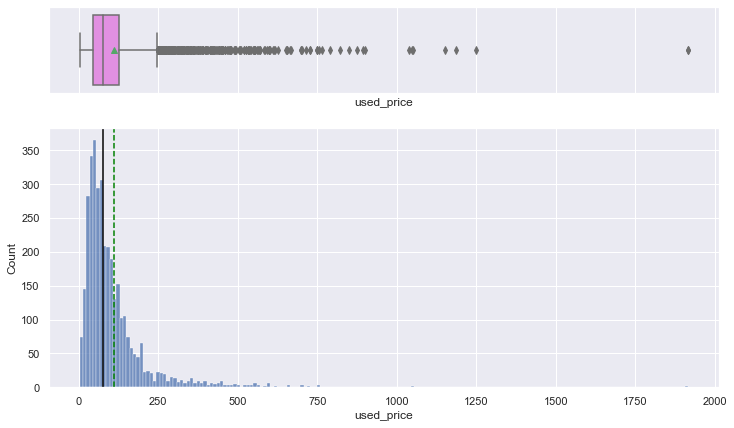

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "used_price")

**Observations**

* The distribution of used_price is heavily skewed to the right.
* The outliers to the right indicate that used/refurbished phone have a very high price.

**Explore the variable *screen_size***

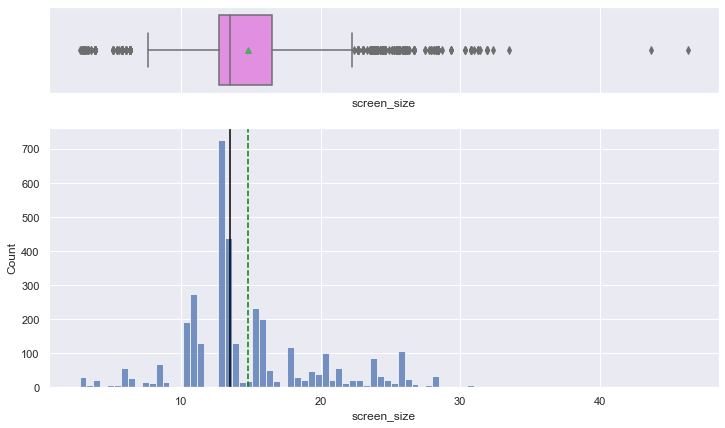

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df, "screen_size")

**Observations**

* The distribution of screen_size is heavily skewed to the right and a bit skewed to the left.
* The outliers to the right and left signifies that the screen size ranges from 2cm to 32cm approximately
* The median screen size is approximately 14cm

**Explore the variable *main_camera_mp***

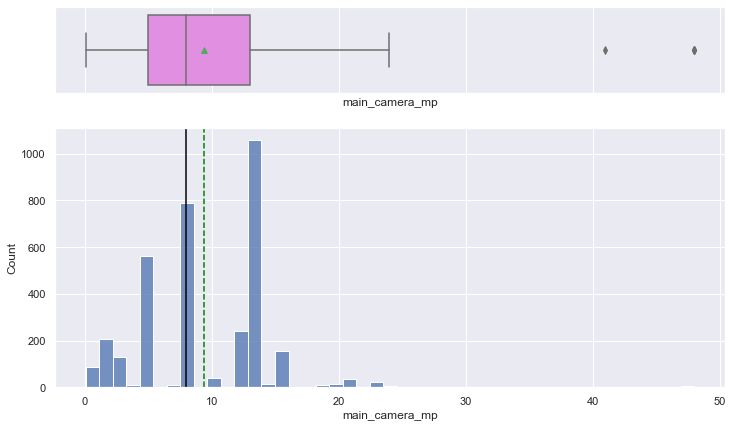

<IPython.core.display.Javascript object>

In [8]:
histogram_boxplot(df, "main_camera_mp")

**Observations**

* main_camera_mp is slightly skewed to the right.
* The resolution size of the rear camera is between 0mp to 25mp.
* The average resolution size of the rear camera is 9mp approximately

**Explore the variable *selfie_camera_mp***

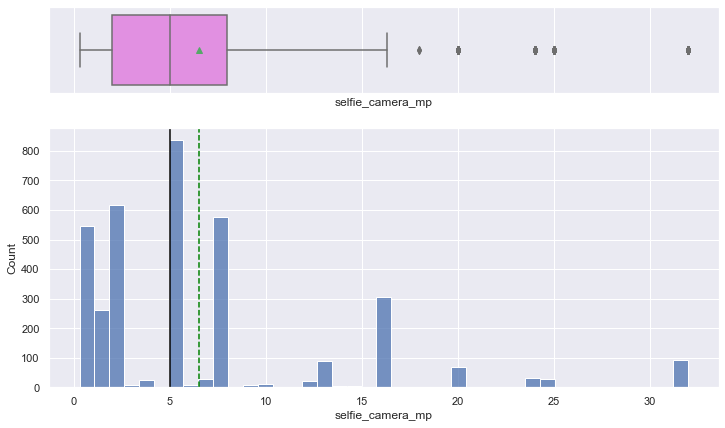

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, "selfie_camera_mp")

**Observations**

* Selfie_camera_mp is slightly skwed to the right.
* The resolution of the front camera is from 2mp to approximately 33mp.
* The average resolution size is 7mp approximately

**Explore the variable *int_memory***

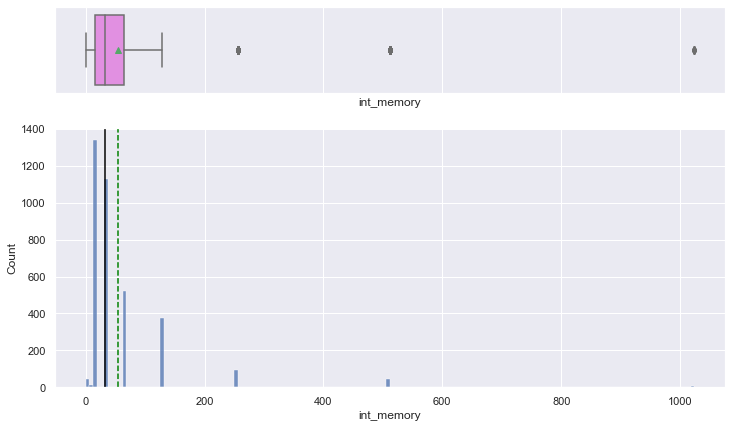

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "int_memory")

**Observations**

* The distribution of ROM is slightly skwed to the right.
* The internal memory size is  from 0 to 500GB approximately.
* The average ROM size is approximately 40GB

**Explore the variable *ram***

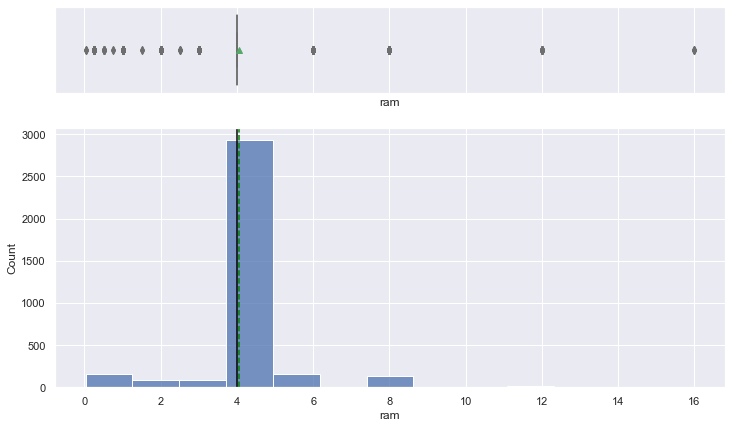

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(df, "ram")


**Observations**

* The distribution of RAM is skwed both to the left and right.
* The RAM size is  from 0 to 8GB which is smaller compared to the ROM.
* The average RAM size is approximately 4GB

**Explore the variable *battery***

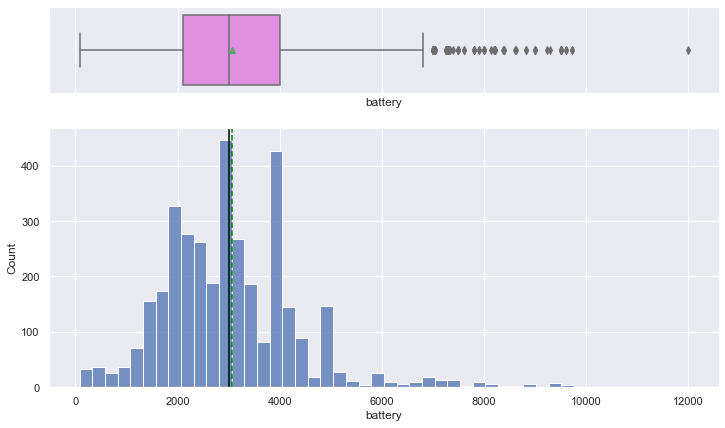

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(df, "battery")

**Observations**

* The battery is skwed to the right, this means the energy capacity is high.
* The average and median energy capacity of the battery is 3000mAh approximately.

**Explore the variable *weight***

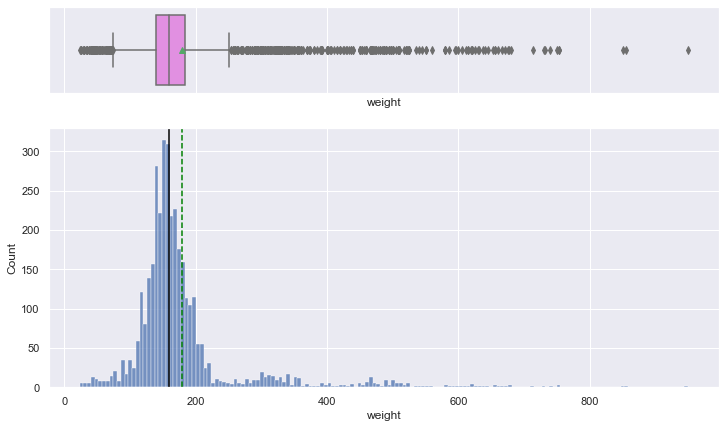

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(df, "weight")

**Observations**

* The weight is heavily skwed both to the right and partly to the left.
* The weight of the phone is 50g to 800g approximately.
* The average weight of the phone is 180g approximately.

**Explore the variable *release_year***

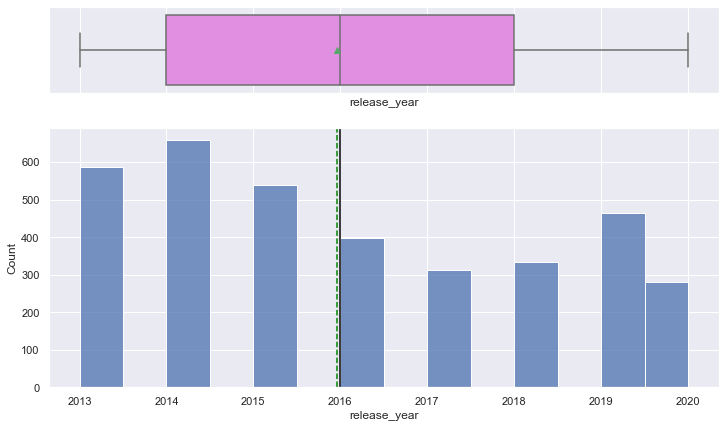

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(df, "release_year")

**Observations**

* The distribution of release_year is on a normal distribution.
* Phone models were released within the year 2013 to 2020
* The average and median release_year was 2016

**Explore the variable *days_used***

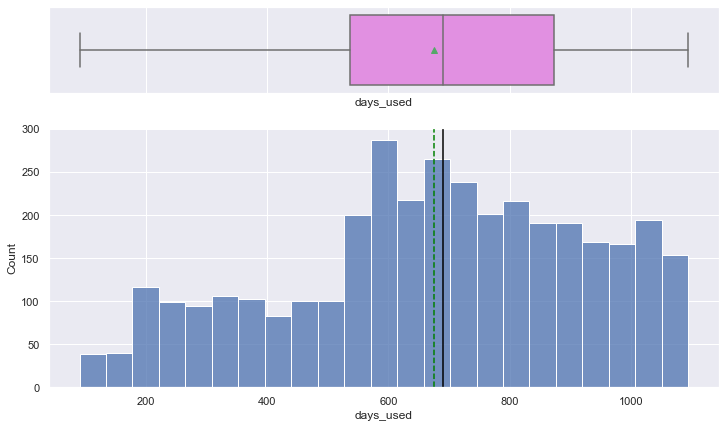

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(df, "days_used")

**Observations**

* The distribution of the number of days used/refurbished phone has been used is normal
* 600days has the maximum count of usage
* The average of days_used is 600days

**Explore the variable *new_price***

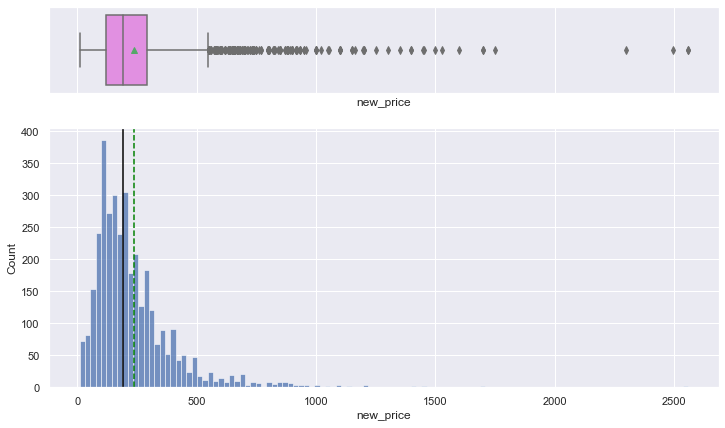

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(df, "new_price")

**Observations**

* The distribution of new_price is heavily skewed to the right.
* The outliers to the right indicate that the new price for used/refurbished phone is very high.

**Exploring categorical variables**

In [32]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

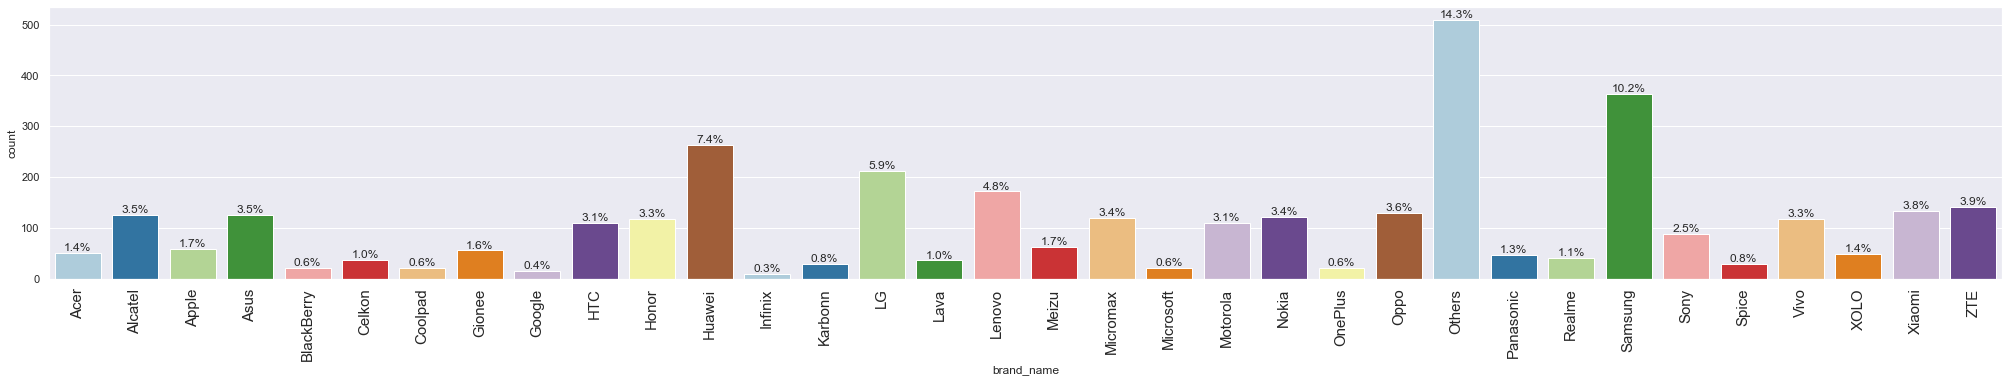

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(data, "brand_name", perc=True)

**Observations**

* The least brand is infinix with 0.3% count.
* The highest brand_name count is on Others with 14.3%.
* Alcatel and Asus had same number of count of 3.5%

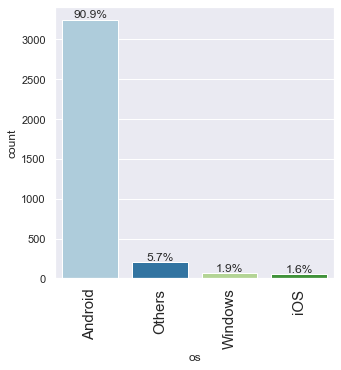

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(data, "os", perc=True)

**Observations**

* Android used phones had the highest count with 90.9%.
* The least os used was iOS with 1.6%.

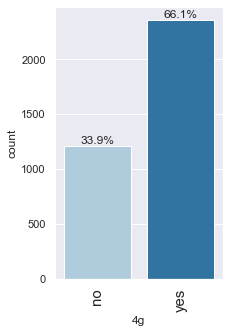

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(data, "4g", perc=True)

**Observations**

* People used 4g phones more than 5g with 66.1%.
* It's availability is 66.1%


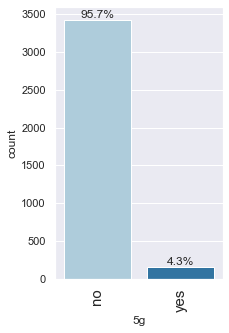

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(data, "5g", perc=True)

**Observations**

* The availability of 5g phones is small compared to 4g with 4.3%.
* 5g phones has 95.7% unavailability.

## Bivariate Analysis

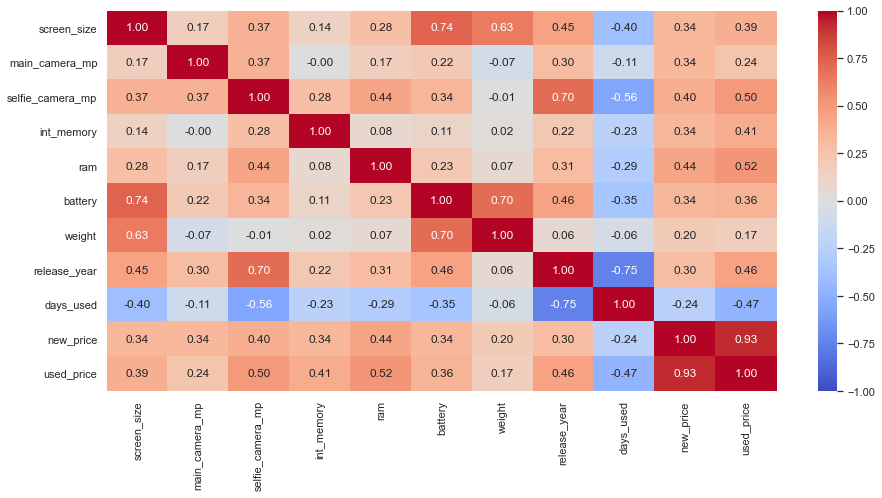

<IPython.core.display.Javascript object>

In [38]:
# Check for correlation among numerical variables
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm",
)
plt.show()

**Observations**

* *days_used* is highly negatively correlated with *release_year* and *selfie_camera_mp*, which means that as release_year and selfie_camera_mp resolution increases, days_used tends to decrease.
* *used_price is negatively correlated with days_used.

* *used_price* is highly positively correlated with *new_price*, which means that as the used_price increases, new_price tends to increase.
* *screen_size* is positively correlated with *battery*, which means as screen_size increase, battery capacity increases.

### Bivariate Scatter Plots

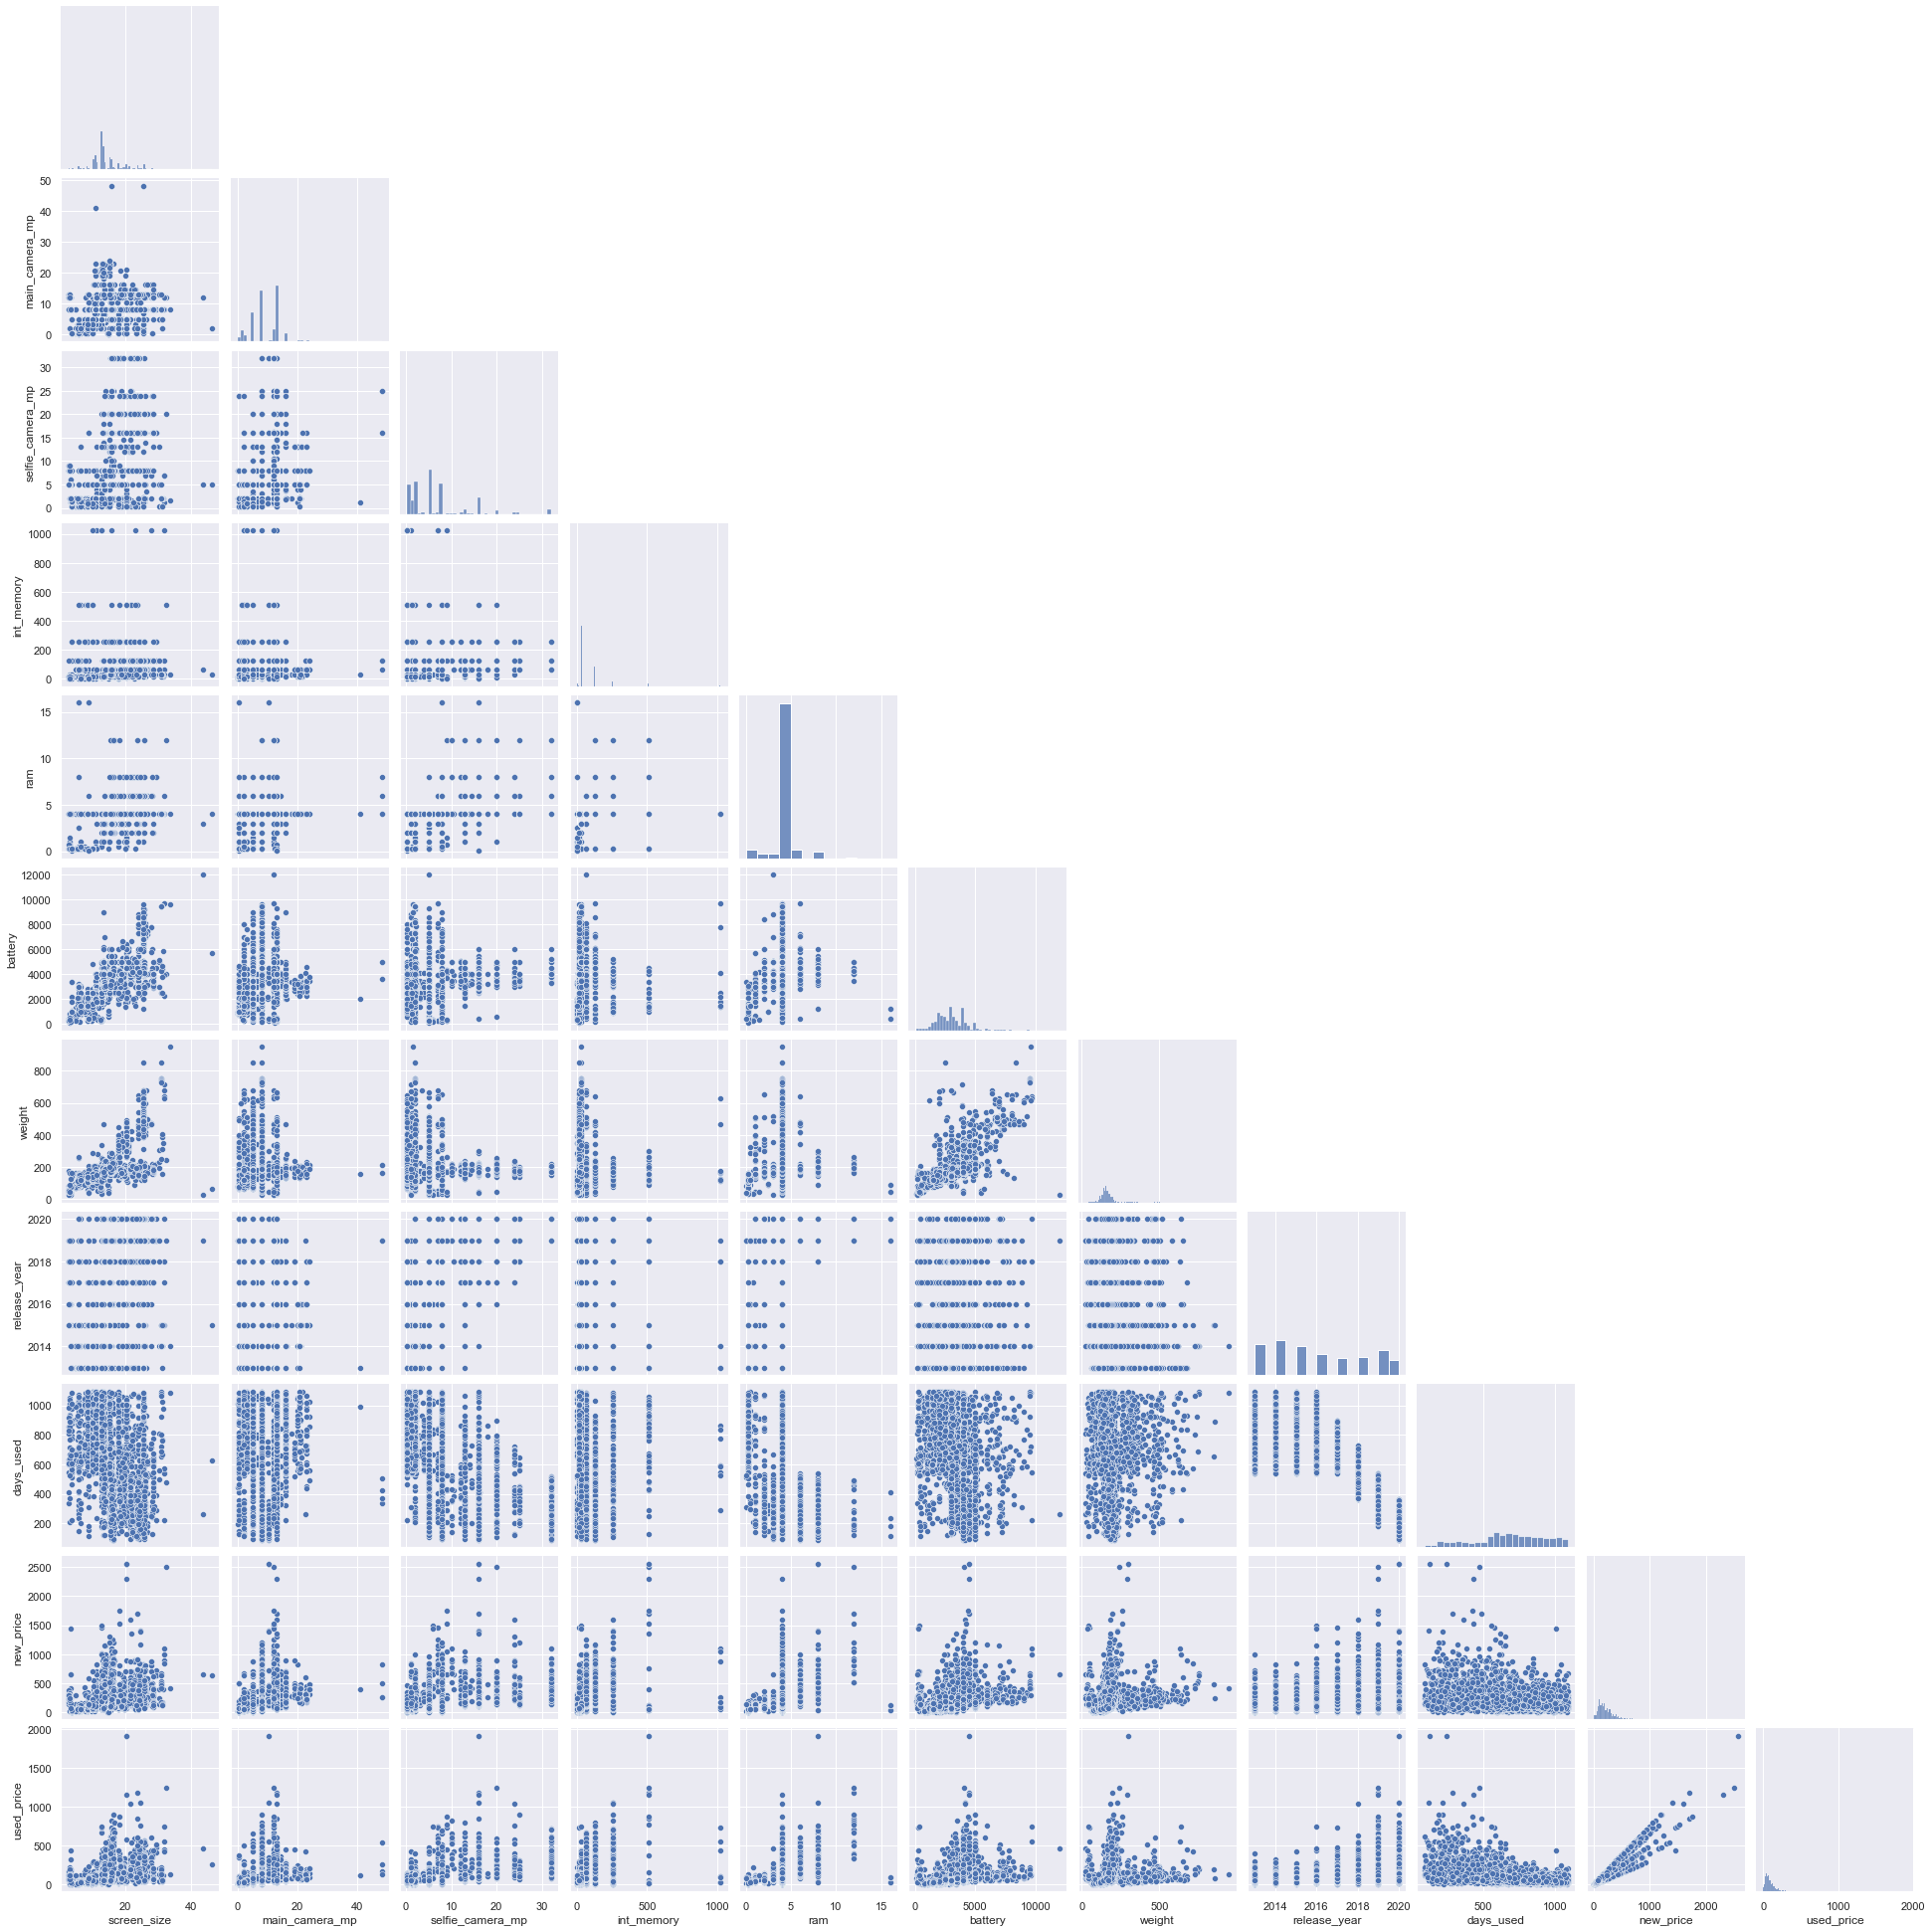

<IPython.core.display.Javascript object>

In [39]:
sns.pairplot(df[numeric_columns], corner=True)
plt.show()

**Observations**

* Same observations from correlation plots holds in scatter plots

**looking at the graphs of a few variables that are highly positively correlated and negatively correclated with *used_price*.**

***used_price* vs *new_price* vs *4g***

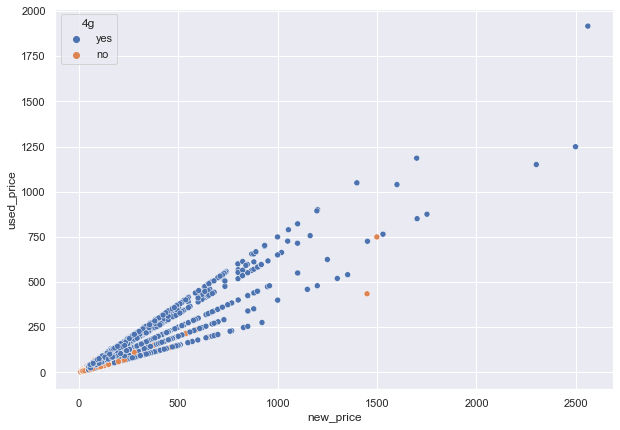

<IPython.core.display.Javascript object>

In [41]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="used_price", x="new_price", hue="4g", data=df)
plt.show()

* As used price in 4g increases , new_price increases

***used_price* vs *new_price* vs *5g***

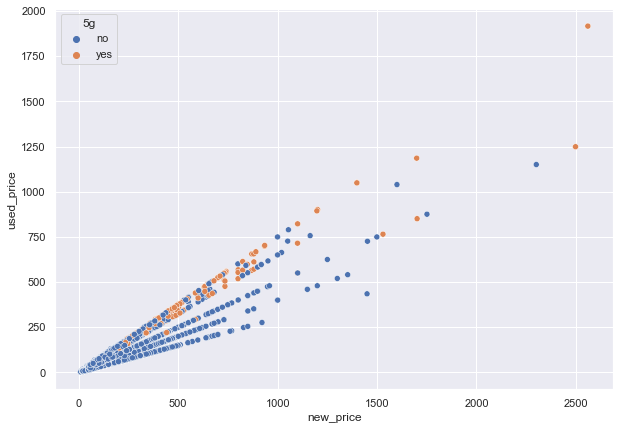

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="used_price", x="new_price", hue="5g", data=df)
plt.show()

* As 5g increases, new_price increases.

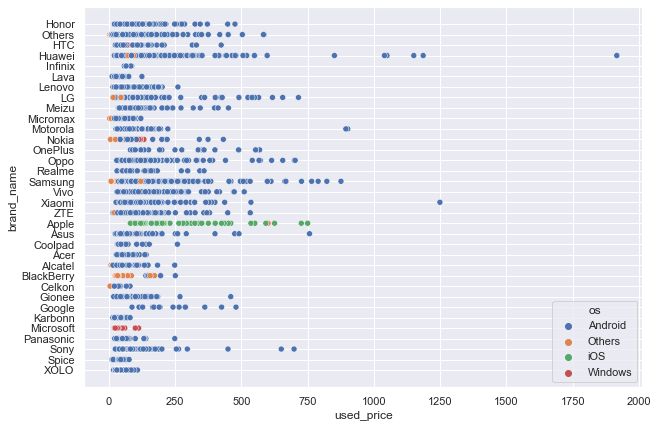

<IPython.core.display.Javascript object>

In [86]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="brand_name", x="used_price", hue="os", data=df)
plt.show()

**Observations**
* The maximun used_price for Android phones is ~1900euros
* The maximum used_price for ios phones is 750euros
* The maximum used_price for windows phones is 120euros
* The maximum used_price for Others phones is 200euros
* In overall Android phones are most expensive.

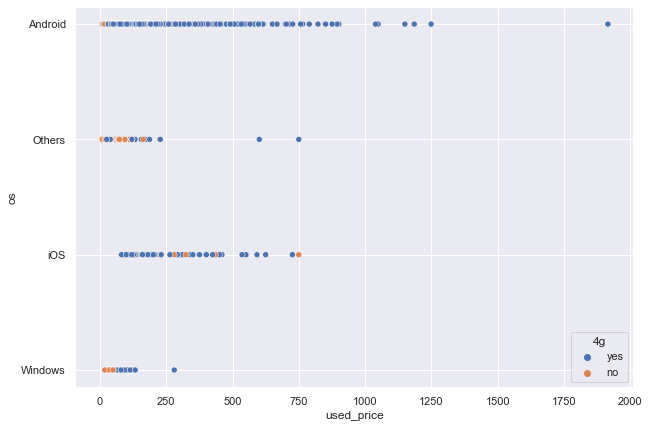

<IPython.core.display.Javascript object>

In [88]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="os", x="used_price", hue="4g", data=df)
plt.show()

**Observation**
* Android devices has the highest price
* Windows devices has the least price

***used_price* vs *days_used***

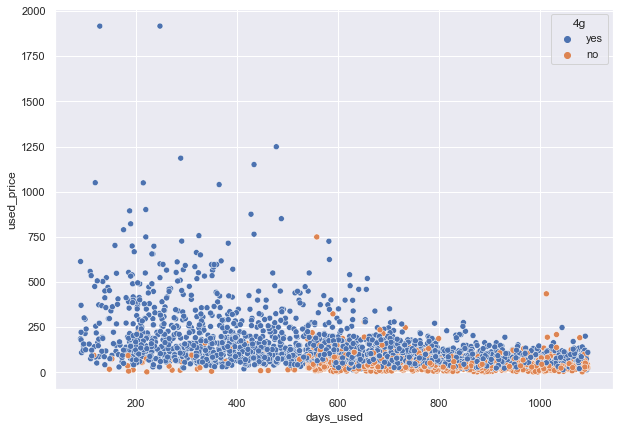

<IPython.core.display.Javascript object>

In [87]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="used_price", x="days_used", hue="4g", data=df)
plt.show()

* Low used_prices lasted for more days, up to 1000 and more days
* High used_prices stayed for about 220days

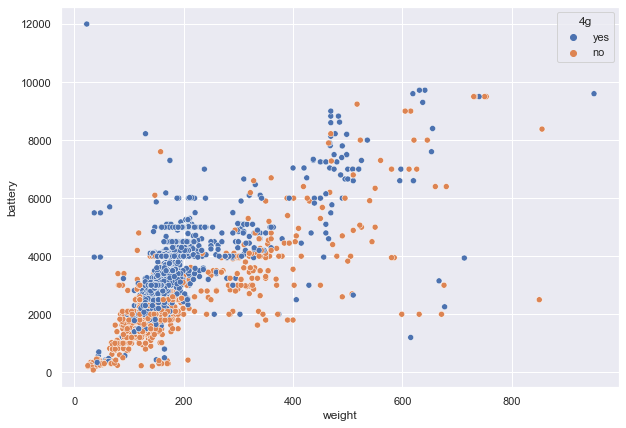

<IPython.core.display.Javascript object>

In [44]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="battery", x="weight", hue="4g", data=df)
plt.show()

* The larger the battery size, the more the weight of the phone both in 4g and 5g

**Checking the variation in *used_price* with *release_year***

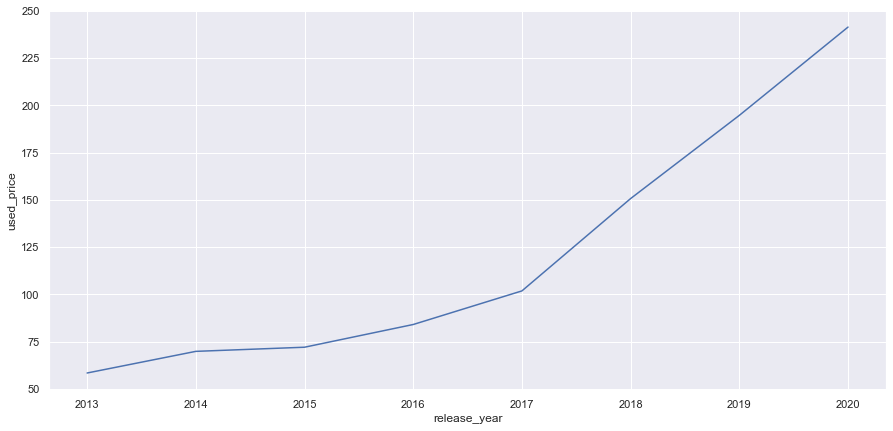

<IPython.core.display.Javascript object>

In [45]:
# average used_price over the release_years
plt.figure(figsize=(15, 7))
sns.lineplot(x="release_year", y="used_price", data=df, ci=None)
plt.show()

**Observation**
* Overall used_price of the used/refurbished phone is increasing over the years.


In [46]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

<IPython.core.display.Javascript object>

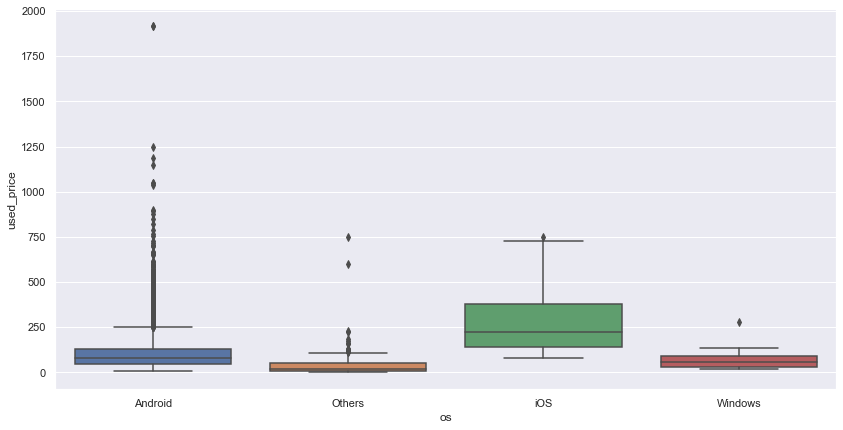

<IPython.core.display.Javascript object>

In [94]:
plt.figure(figsize=(14, 7))
sns.boxplot(df["os"], df["used_price"])
plt.ylabel("used_price")
plt.xlabel("os")
plt.show()

**Observation**
* Android devices has the maximum used price, with heavy upper outliers
* Windows devices has the least amount, with slight upper outliers

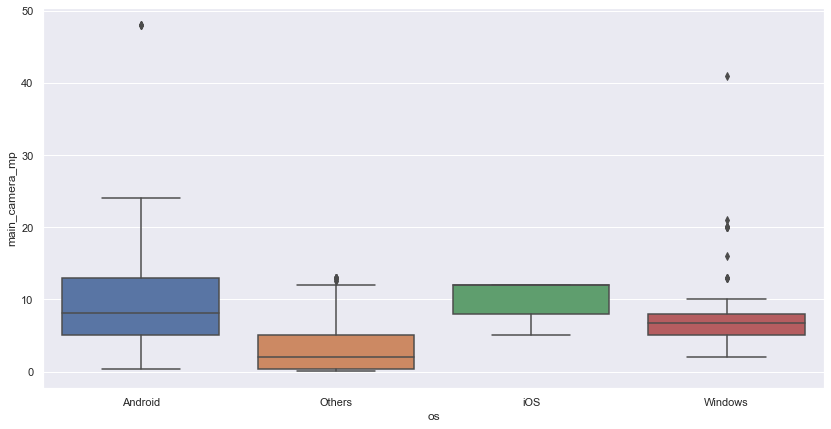

<IPython.core.display.Javascript object>

In [100]:
plt.figure(figsize=(14, 7))
sns.boxplot(df["os"], df["main_camera_mp"])
plt.ylabel("main_camera_mp")
plt.xlabel("os")
plt.show()

**Observations**
* ios devices has no outliers with main_camera_mp
* All others have outliers with main_camera_mp

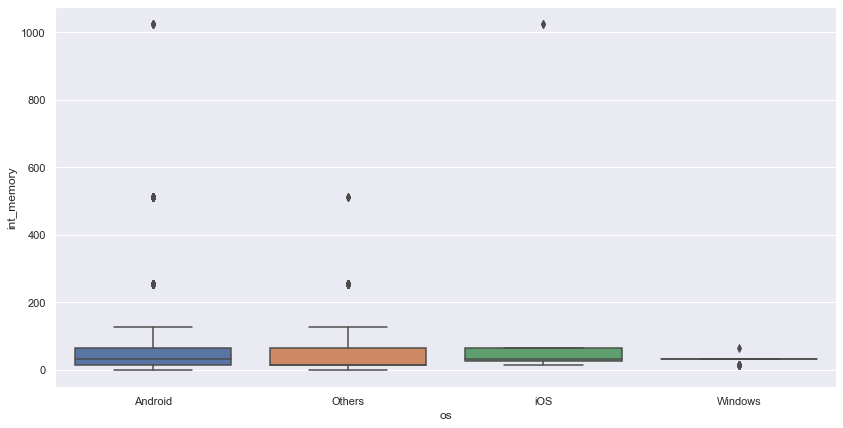

<IPython.core.display.Javascript object>

In [101]:
plt.figure(figsize=(14, 7))
sns.boxplot(df["os"], df["int_memory"])
plt.ylabel("int_memory")
plt.xlabel("os")
plt.show()

* All devices have upper outliers

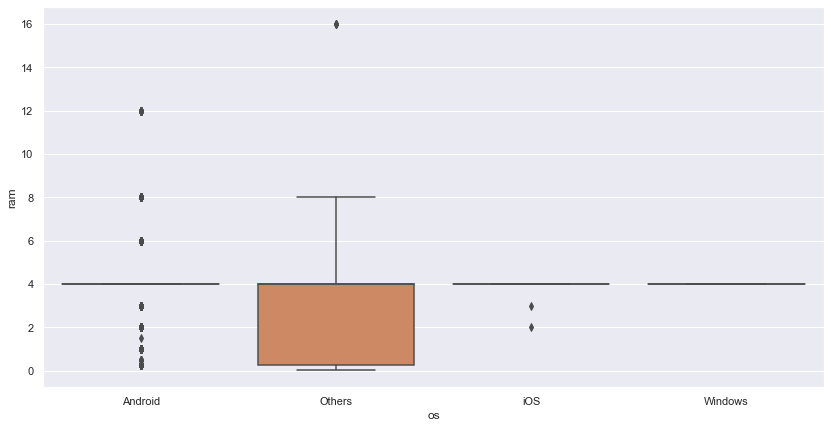

<IPython.core.display.Javascript object>

In [102]:
plt.figure(figsize=(14, 7))
sns.boxplot(df["os"], df["ram"])
plt.ylabel("ram")
plt.xlabel("os")
plt.show()

**Observations**

* Windows devices have no outliers
* All others have outliers, with others havings a big box


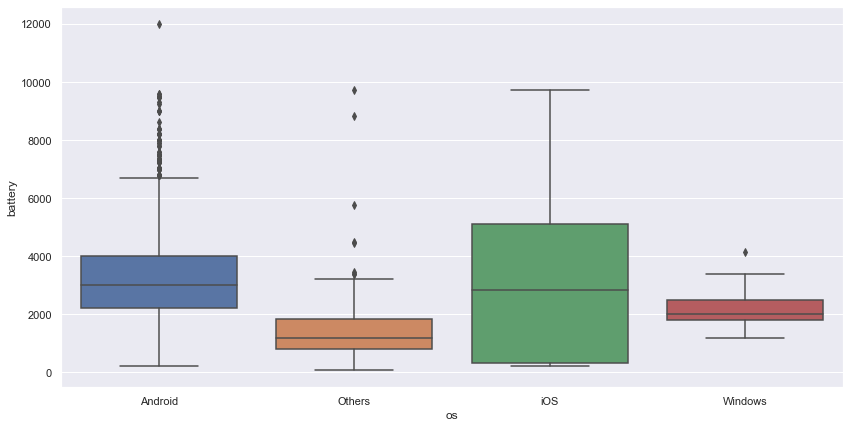

<IPython.core.display.Javascript object>

In [105]:
plt.figure(figsize=(14, 7))
sns.boxplot(df["os"], df["battery"])
plt.ylabel("battery")
plt.xlabel("os")
plt.show()

**Observations**

* ios device has no outliers, while the rest has outliers

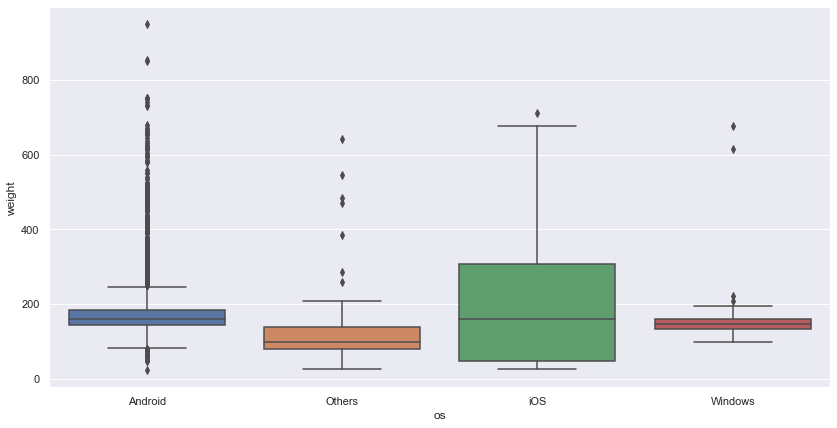

<IPython.core.display.Javascript object>

In [106]:
plt.figure(figsize=(14, 7))
sns.boxplot(df["os"], df["weight"])
plt.ylabel("weight")
plt.xlabel("os")
plt.show()

**Observations**

* All devices has upper outliers

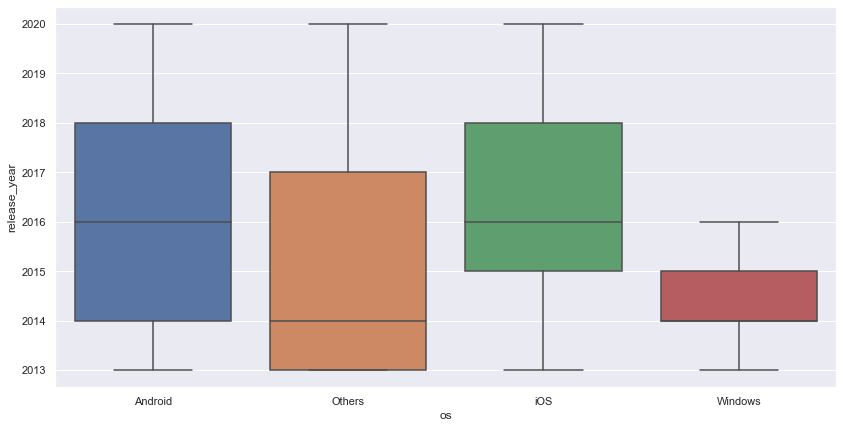

<IPython.core.display.Javascript object>

In [108]:
plt.figure(figsize=(14, 7))
sns.boxplot(df["os"], df["release_year"])
plt.ylabel("release_year")
plt.xlabel("os")
plt.show()

**Observations**

* None of these devices has outliers

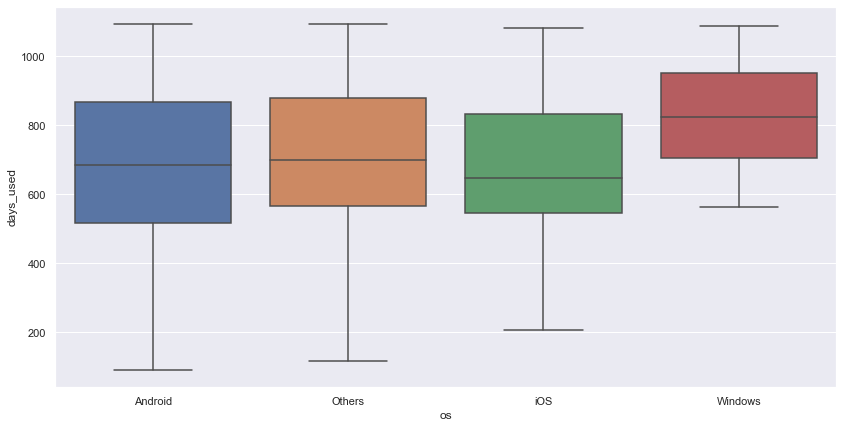

<IPython.core.display.Javascript object>

In [109]:
plt.figure(figsize=(14, 7))
sns.boxplot(df["os"], df["days_used"])
plt.ylabel("days_used")
plt.xlabel("os")
plt.show()

**Observations**

* No outliers seen.

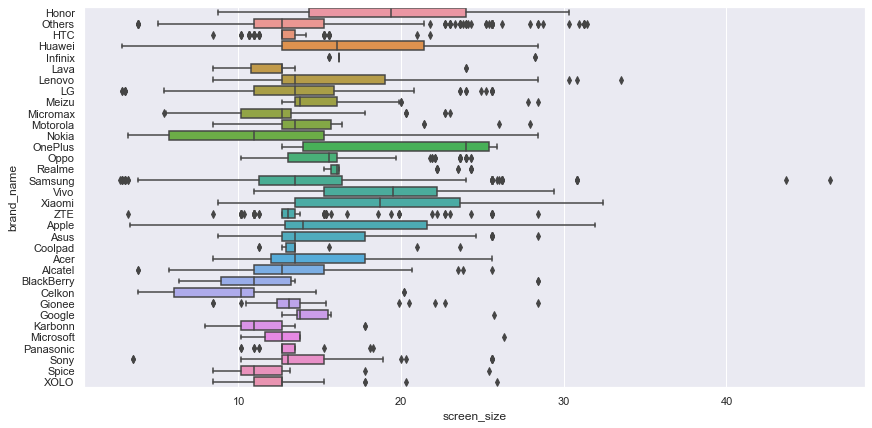

<IPython.core.display.Javascript object>

In [99]:
plt.figure(figsize=(14, 7))
sns.boxplot(df["screen_size"], df["brand_name"])
plt.ylabel("brand_name")
plt.xlabel("screen_size")
plt.show()

* 100% of the brand phones had a screen size larger than 6inch

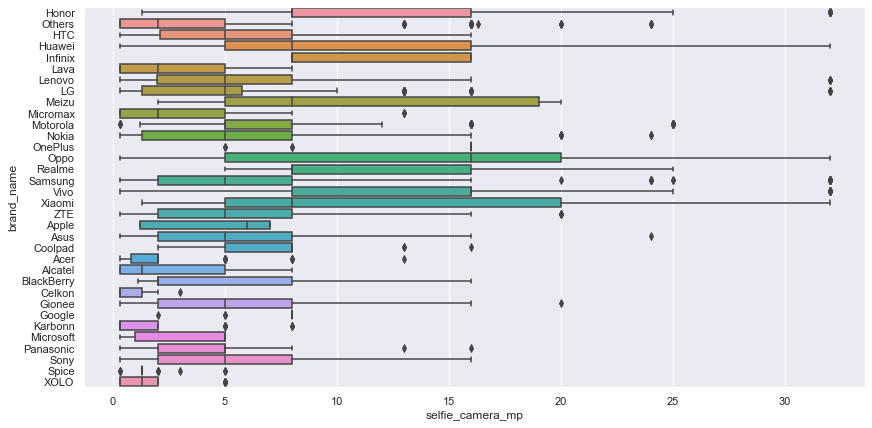

<IPython.core.display.Javascript object>

In [57]:
plt.figure(figsize=(14, 7))
sns.boxplot(df["selfie_camera_mp"], df["brand_name"])
plt.ylabel("brand_name")
plt.xlabel("selfie_camera_mp")
plt.show()

**Observation**
* About 24% of brand phones had greater than 8MP of selfie cameras

# Questions:

1. What does the distribution of used phone prices look like?

Ans:
* The distribution of used phone prices looks high with respect to the skewness of the prices to the right.
* The used phone had a maximum price of 750euro for Apple brand.

2. What percentage of the used phone market is dominated by Android devices?

Ans:
* Android devices dominated by 90.9%
      
3. The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?

Ans:
* Most of the brands had outliers, only oneplus brand had the largest RAM size of 12GB
* Only 8% of the brands had average RAM size is 4GB, and 14% exceeded the average size
* The others were outliers

4. A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?

Ans:
* As the size of battery increases, the weight of the phone also increases
* Batteries with more than 4500mAh had weights ranging from 400g to approximately 900g


5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?

Ans:
* 100% of phones across the different brands had a screen size larger than 6inch

6. Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?

Ans:
* Approximately 24% of budget phones offer greater than 8MP selfie cameras across the brand

7. Which attributes are highly correlated with the used phone price?

Ans:
* new_price had 0.93 correlation with used phone price, this is highly correlated.

## Data Preprocessing

### Missing Value Treatment

In [18]:
# checking for missing values
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

**Let's fix the missing values.**
- I will replace the missing values in each column with its median.


In [6]:
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller, axis=0)

<IPython.core.display.Javascript object>

In [21]:
# checking the number of missing values
df.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

<IPython.core.display.Javascript object>

- All missing values have been treated

###  Feature Engineering

In [29]:
# We need to look at the statistical summary of the data in order to know how to prepare the data for whatever comes next.
pd.set_option(
    "display.float_format", lambda x: "%.3f" % x
)  # to display numbers rounded off to 3 decimal places

df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.000,NaN,NaN,NaN,14.804,5.153,2.700,12.700,13.490,16.510,46.360
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3571.000,NaN,NaN,NaN,9.330,4.705,0.080,5.000,8.000,13.000,48.000
selfie_camera_mp,3571.000,NaN,NaN,NaN,6.546,6.878,0.300,2.000,5.000,8.000,32.000
int_memory,3571.000,NaN,NaN,NaN,54.470,84.586,0.005,16.000,32.000,64.000,1024.000
ram,3571.000,NaN,NaN,NaN,4.057,1.390,0.030,4.000,4.000,4.000,16.000
battery,3571.000,NaN,NaN,NaN,3067.113,1363.063,80.000,2100.000,3000.000,4000.000,12000.000


<IPython.core.display.Javascript object>

### Outlier Detection

- checking for outliers in every numerical column

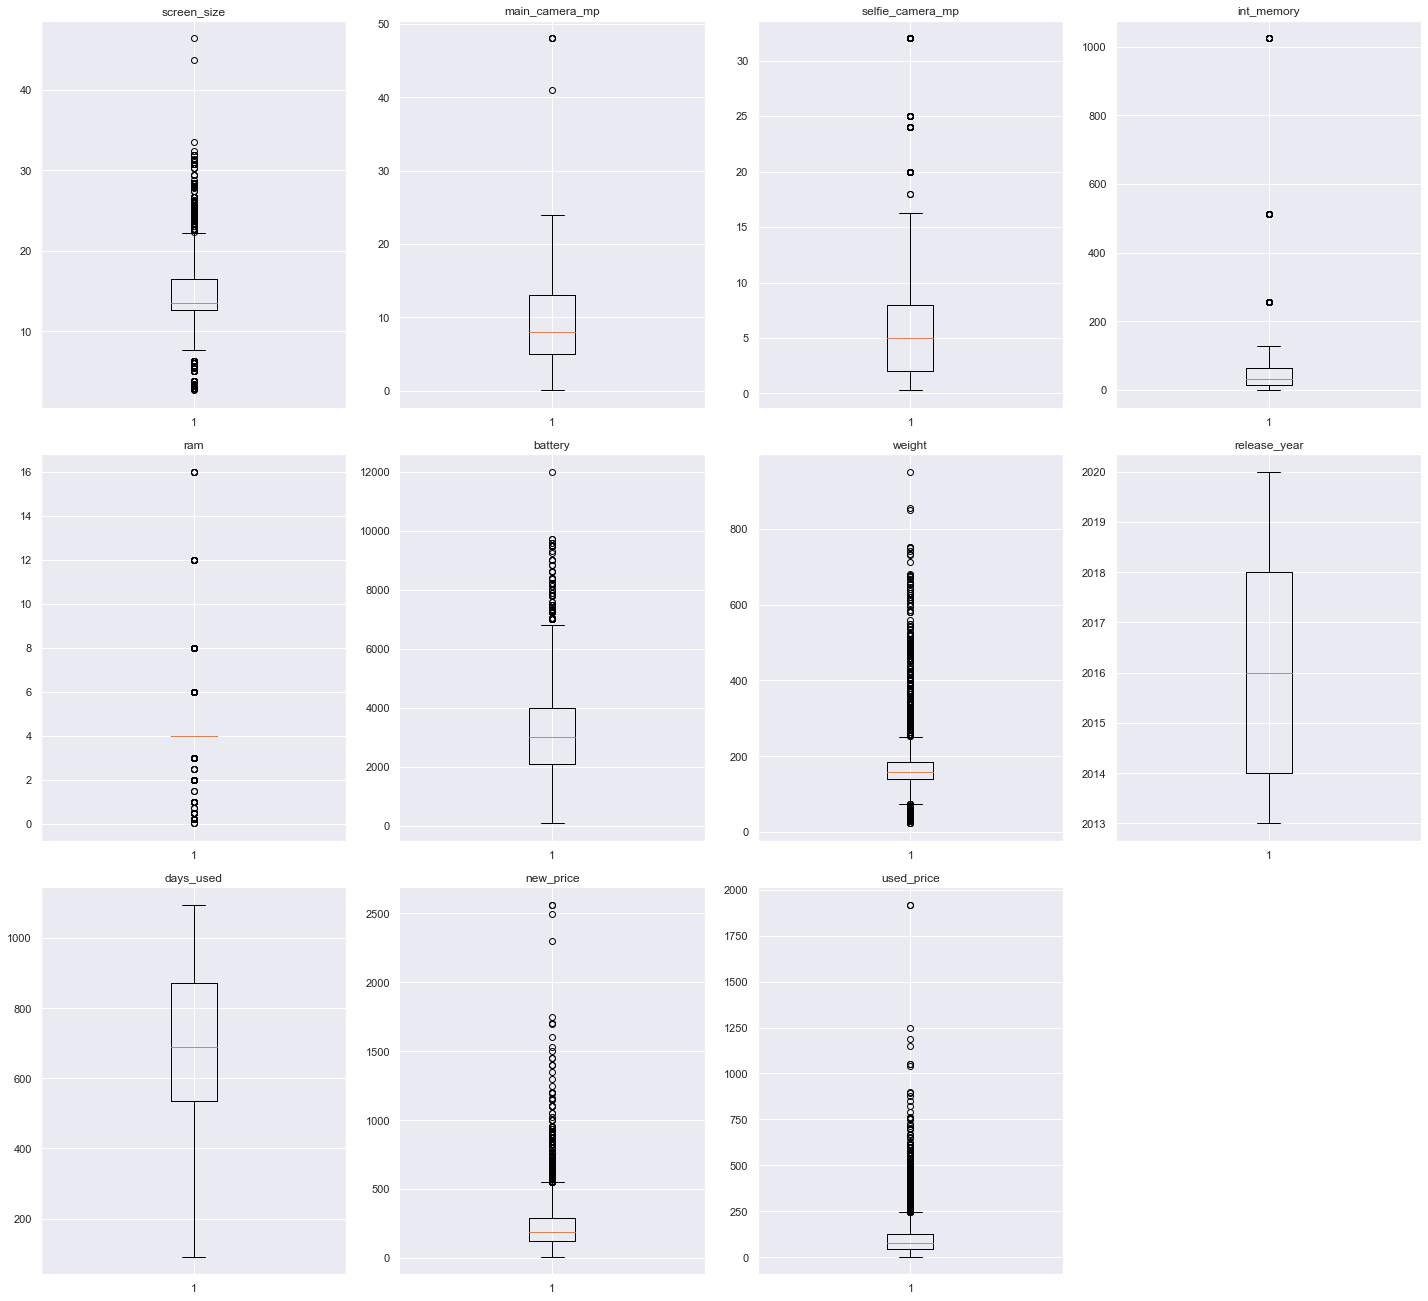

<IPython.core.display.Javascript object>

In [13]:
# Plotting the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

* There are upper outliers in *used_price*, *new_price*, *battery*, *int_memory*, *selfie_camera_mp* and *main_camera_mp*.

* There are no outliers in *release_year* and *days_used*.

* All other numerical columns have both upper and lower outliers.

* I will treat these outliers as these might adversely affect the predictive power of linear model. 

### Outlier Treatment

In [78]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [79]:
# treating the outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

<IPython.core.display.Javascript object>

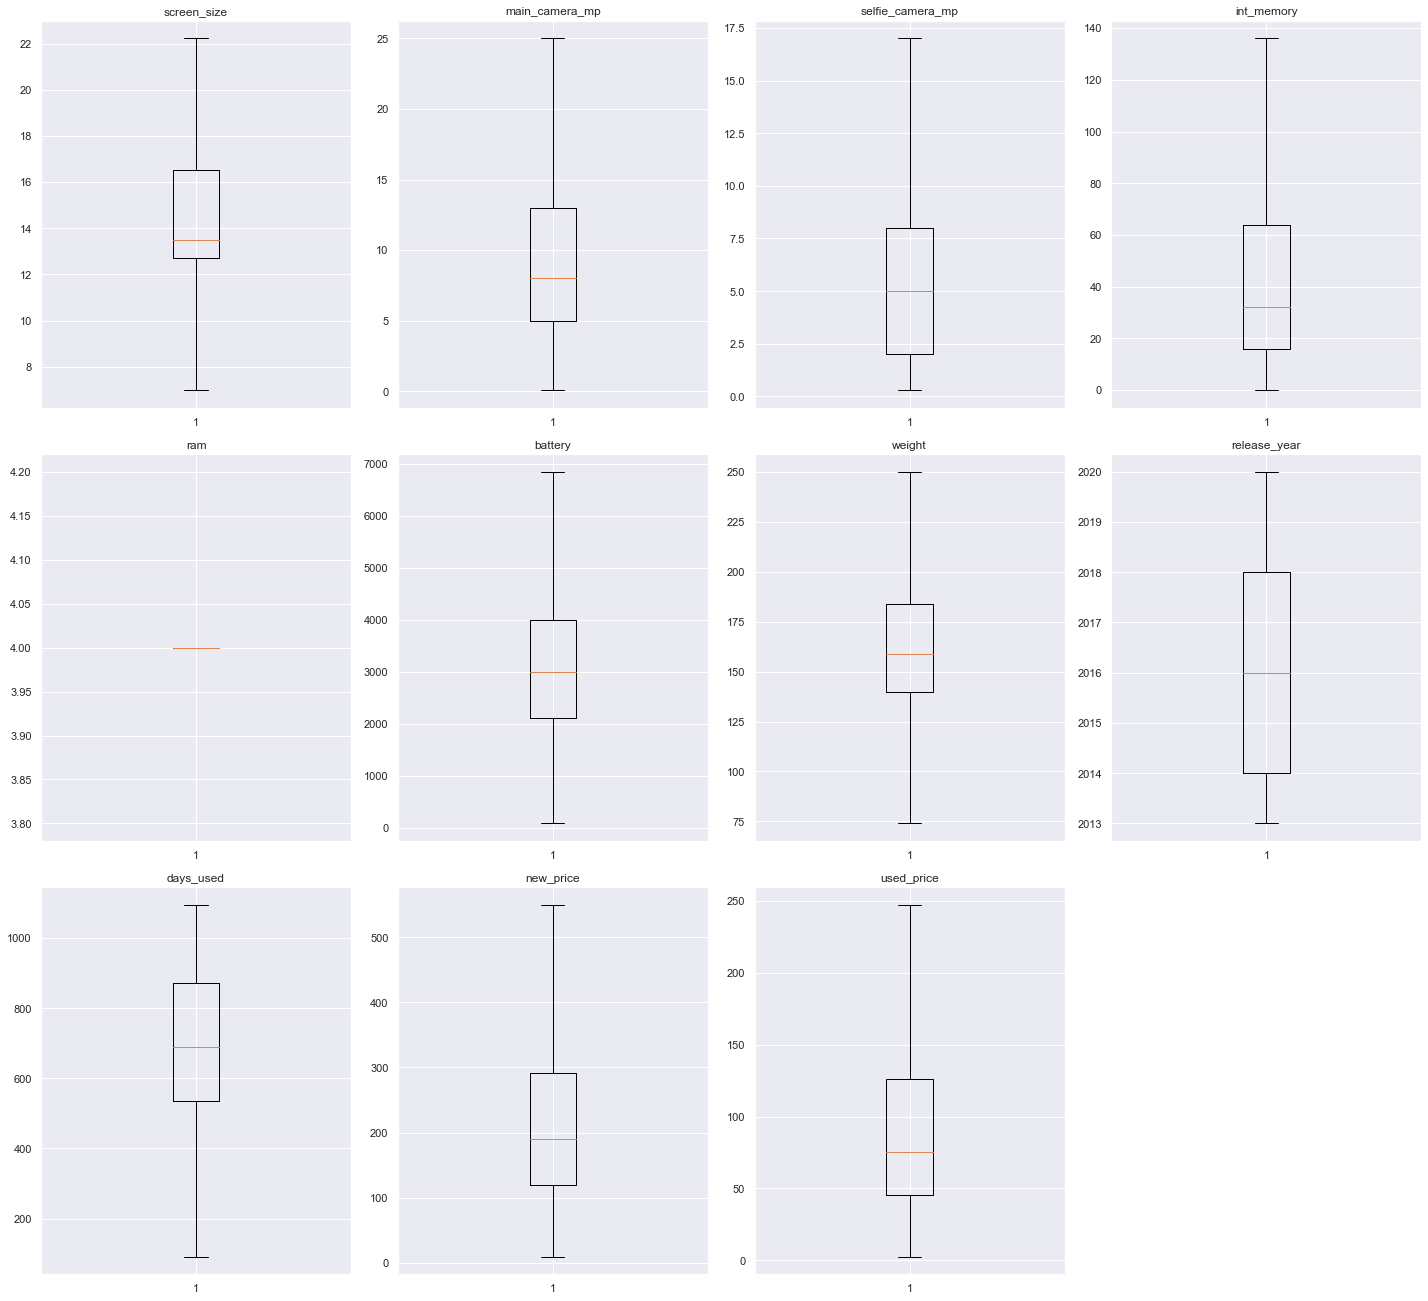

<IPython.core.display.Javascript object>

In [80]:
# Checking the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observation**
* Outliers treated.

## Linear Model Building

1. Predict the price of used phone.

2.  Encode categorical features.

3. Split the data into train and test to be able to evaluate the model that we build on the train data.

4. Build a Linear Regression model using the train data and then check it's performance.

In [7]:
# defining X and y variables
X = df.drop(["used_price"], axis=1)
y = df["used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        23.97  yes   no            13.0   
1      Honor  Android        28.10  yes  yes            13.0   
2      Honor  Android        24.29  yes  yes            13.0   
3      Honor  Android        26.04  yes  yes            13.0   
4      Honor  Android        15.72  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  new_price  
0        127     111.62  
1        325     249.39  
2        162     359.47  
3        345     278.93  
4        293     140.87  
0     86.96
1    161.49
2    268

<IPython.core.display.Javascript object>

In [8]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,23.97,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,...,0,0,0,0,0,0,0,0,1,0
1,28.10,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,...,0,0,0,0,0,0,0,0,1,1
2,24.29,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,...,0,0,0,0,0,0,0,0,1,1
3,26.04,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,...,0,0,0,0,0,0,0,0,1,1
4,15.72,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [14]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=32
)

<IPython.core.display.Javascript object>

In [25]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2499
Number of rows in test data = 1072


<IPython.core.display.Javascript object>

## Linear Regression using statsmodels

- Building the linear regression model using statsmodels.

In [15]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     979.4
Date:                Wed, 29 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:09:36   Log-Likelihood:                -11906.
No. Observations:                2499   AIC:                         2.391e+04
Df Residuals:                    2450   BIC:                         2.420e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5683.15

<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient show that *used_price* decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that *used_price* increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.


## Checking Linear Regression Assumptions:



1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. 

* One way of testing multicollinearity is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**: It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [17]:
checking_vif(x_train1)

,feature,VIF
0,const,3.406218e+06
1,screen_size,3.354387e+00
2,main_camera_mp,1.956500e+00
3,selfie_camera_mp,2.658426e+00
4,int_memory,1.535046e+00
5,ram,1.874301e+00
6,battery,4.123811e+00
7,weight,3.645820e+00
8,release_year,4.424409e+00
9,days_used,2.628054e+00


<IPython.core.display.Javascript object>

**Observations**
* *brand_name_Huawei*,  *brand_name_Samsung*,  *brand_name_LG* and *brand_name_Others have VIF slightly greater than 5.
* *brand_name_Apple* and *os_iOS* have a VIF score of much greater than 5.
* Clearly these 2 variables are correlated with each other.


### Removing Multicollinearity



1. Drop all columns that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

In [32]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [34]:
col_list = [
    "brand_name_Apple",
    "os_iOs",
    "brand_name_Huawei",
    "brand_name_Samsung",
    "brand_name_LG"
]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Huawei,0.950,28.649
1,brand_name_LG,0.950,28.649
2,os_iOs,0.949,28.655
3,brand_name_Samsung,0.949,28.659
4,brand_name_Apple,0.949,28.794


<IPython.core.display.Javascript object>

* Dropping *brand_name_Apple* would have the maximum impact on the predictive power of the model (amongst the variables being considered).
* I will drop *brand_name_Huawei* and check the VIF again.

In [18]:
col_to_drop = "brand_name_Huawei"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Huawei


,feature,VIF
0,const,3.405435e+06
1,screen_size,3.354369e+00
2,main_camera_mp,1.955962e+00
3,selfie_camera_mp,2.654123e+00
4,int_memory,1.533951e+00
5,ram,1.874219e+00
6,battery,4.120991e+00
7,weight,3.639085e+00
8,release_year,4.422747e+00
9,days_used,2.627391e+00


<IPython.core.display.Javascript object>

* Dropping *brand_name_Huawei* has brought the VIF of *brand_name_Samsung*, *brand_name_LG*, and *brand_name_Others* below 5.
* *brand_name_Apple* and *os_iOS* still have a VIF score of much greater than 5.

In [36]:
col_list = [
    "brand_name_Apple",
    "os_iOS",
]

res = treating_multicollinearity(x_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Apple,0.949,28.791
1,os_iOS,0.949,28.872


<IPython.core.display.Javascript object>

- We will drop *brand_name_Apple*.

In [19]:
col_to_drop = "brand_name_Apple"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,3.403139e+06
1,screen_size,3.350646e+00
2,main_camera_mp,1.955072e+00
3,selfie_camera_mp,2.647768e+00
4,int_memory,1.533949e+00
5,ram,1.872109e+00
6,battery,4.118756e+00
7,weight,3.634158e+00
8,release_year,4.419790e+00
9,days_used,2.627034e+00


<IPython.core.display.Javascript object>

**The above predictors have no multicollinearity and the assumption is satisfied.

*check the model performance.

In [38]:
olsmod1 = sm.OLS(y_train, x_train3).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     1012.
Date:                Sun, 26 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:45:14   Log-Likelihood:                -11919.
No. Observations:                2499   AIC:                         2.393e+04
Df Residuals:                    2452   BIC:                         2.421e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5823.63

<IPython.core.display.Javascript object>

**Observations**

- It can be seen that adj. R-squared remained same as 0.949, which shows that the dropped columns did not have much effect on the model.
- As there is no multicollinearity, I will use p-values of predictor variables to check their significance.

*battery*,*weight*,*band_name_Alcatel*,*band_name_BlackBerry*,*band_name_Clekon*,*band_name_Coolpad*,*band_name_Google*,*band_name_HTC*,*band_name_Infinix*,*band_name_Karbonn*,*band_name_LG*,*band_name_Lava*,
*Lenovo*,*band_name_Micromax*,*band_name_Microsoft*,*band_name_Motorola*,*band_name_OnePlus*,*band_name_Others*,*band_name_Panasonic*,*band_name_Sony*,*band_name_Spice*,*band_name_XOLO*,*band_name_Xiaomi*,*band_name_ZTE*,
*os_Others,and *os_windows* have p-value > 0.05. So, they are not significant and will be dropped.


T

In [21]:
# initial list of columns
cols = x_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train3[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'int_memory', 'ram', 'release_year', 'days_used', 'new_price', 'brand_name_Gionee', 'brand_name_Honor', 'brand_name_Nokia', 'brand_name_Oppo', 'brand_name_Others', 'brand_name_Realme', 'brand_name_Samsung', 'brand_name_Vivo', 'os_iOS', '4g_yes', '5g_yes']


<IPython.core.display.Javascript object>

In [22]:
x_train4 = x_train3[selected_features]
x_test4 = x_test3[selected_features]

<IPython.core.display.Javascript object>

In [23]:
olsmod2 = sm.OLS(y_train, x_train4).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     2586.
Date:                Wed, 29 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:11:25   Log-Likelihood:                -11932.
No. Observations:                2499   AIC:                         2.390e+04
Df Residuals:                    2480   BIC:                         2.401e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4942.3778    956

<IPython.core.display.Javascript object>

**Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train4* as the final ones and *olsmod2* as final model.**

**Observation**

* The adjusted R-squared in *olsmod0* (where we considered all the variables) was 0.949. This shows that the variables  dropped were not affecting the model.

### TEST FOR LINEARITY AND INDEPENDENCE


* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

In [24]:
# Creating a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
2801,44.96,37.066144,7.893856
2268,29.09,-4.907494,33.997494
1691,41.94,36.574595,5.365405
710,119.86,98.492849,21.367151
902,21.38,13.877444,7.502556


<IPython.core.display.Javascript object>

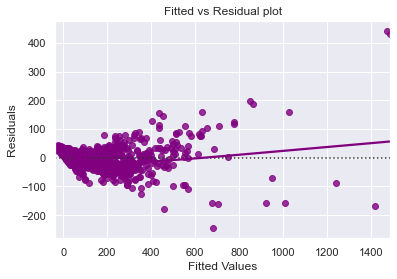

<IPython.core.display.Javascript object>

In [25]:
 # Plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations**
* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* There is no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY


* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.


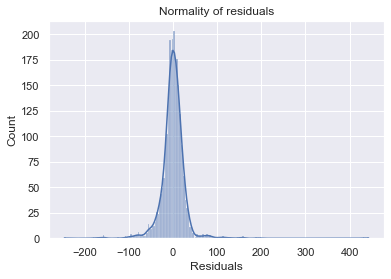

<IPython.core.display.Javascript object>

In [26]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals have a bell shape.
- Hence will check the Q-Q plot.

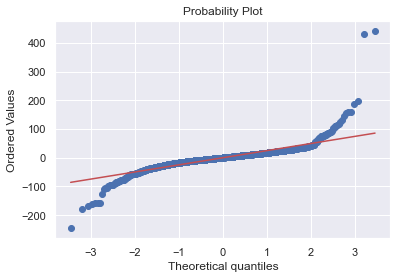

<IPython.core.display.Javascript object>

In [28]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Will check the results of the Shapiro-Wilk test.

In [29]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.7538282871246338, pvalue=0.0)

<IPython.core.display.Javascript object>

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY

* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

In [30]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train4)
lzip(name, test)

[('F statistic', 0.6582423428305861), ('p-value', 0.9999999999998629)]

<IPython.core.display.Javascript object>

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

**Since all the assumptions of linear regression are satisfied, I will now do the prediction.**

In [31]:
# predictions on the test set
pred = olsmod2.predict(x_test4)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
3250,30.10,13.978215
2960,60.00,57.550083
3061,44.46,28.990580
3355,108.50,113.928550
3048,104.57,116.059616
1006,79.82,73.039688
13,89.77,107.190691
2025,59.96,49.760257
1150,124.98,117.222335
810,65.93,68.939651


<IPython.core.display.Javascript object>

- The actual and predicted values are comparable.

- We can also visualize comparison result as a bar graph.

**Note**: As the number of records is large, for representation purpose, only a sample of 25 records will be taken.

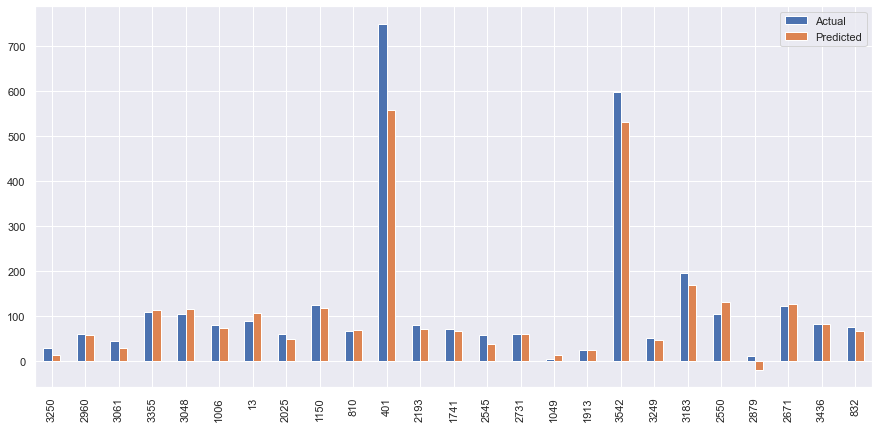

<IPython.core.display.Javascript object>

In [32]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [34]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [35]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train4, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,28.670133,16.815006,0.949419,0.949031,27.175584


<IPython.core.display.Javascript object>

In [36]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test4, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,25.525218,16.222067,0.942145,0.9411,28.12891


<IPython.core.display.Javascript object>

* The model is able to explain ~94% of the variation in the data, which is very good.

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

* The MAPE on the test set suggests we can predict within 28.1% of the used price. 

* Hence, we can conclude the model *olsmod2* is good for prediction as well as inference purposes.



**Recreating the final statsmodels model and print it's summary to gain insights.**

In [37]:
olsmodel_final = sm.OLS(y_train, x_train4).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     2586.
Date:                Wed, 29 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:55:13   Log-Likelihood:                -11932.
No. Observations:                2499   AIC:                         2.390e+04
Df Residuals:                    2480   BIC:                         2.401e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4942.3778    956

<IPython.core.display.Javascript object>

## Conclusions

-In conclusion it can be seen that the below factors significantly influence the price of a used phones;

1. *brand_name* and *os* were very significant. As these two determine the price of the used phone, where android phones were the most expensive.

2. *screen_size*, *camera_main_mp*, *selfie_camera_mp*, *int_memory*,*Ram*, *battery*, and *weight* have positive coefficients. So, as they increase, used_price also increases.

3. *Selfie_camera* and *release_year* are positively correlated. i.e the year selfice camera phones were release, more phones were sold.

4. Screen size and weight of phone are positively correlated to the battery size. Hence when going for a large screen size,  you must consider the battery  size.

5. As used price increased, new price also increased as they were in the same direction.

6. *Selfie_camera_mp* and *used_price* are negatively correlated with *days_used* 

7. In Overall, price increased over the years with these features.

